/bin/bash: -c: line 1: unexpected EOF while looking for matching `"'
/bin/bash: -c: line 2: syntax error: unexpected end of file
Using device: cuda


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

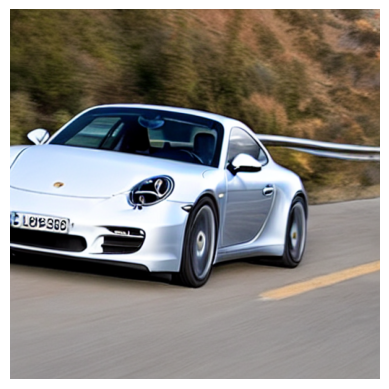

In [23]:
!pip install --upgrade diffusers transformers torch accelerate """ INSTALLING  ALL THE LIBRARIES"""
!pip install Pillow
!pip install accelerate

from diffusers import StableDiffusionPipeline #IMPORTING ALL MODULES
import torch
import matplotlib.pyplot as plt
from PIL import Image
#LOADING THE MODEL
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16 ,safety_checker = None, requires_safety_checker = False)
pipe = pipe.to(device)
#GENERATIN THE IMAGE
def generate_image(prompt, num_inference_steps=50, guidance_scale=7.5):
    with torch.autocast("cuda"):
        image = pipe(prompt, num_inference_steps=num_inference_steps, guidance_scale=guidance_scale).images[0]
    return image

# Example usage
prompt = "a porche"
generated_image = generate_image(prompt)

# Display the generated image
plt.imshow(generated_image)
plt.axis("off")  # Hide the axes
plt.show()


